# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel



from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Import Data

In [ ]:
#!pip install gdown==4.6.0
!gdown --id 1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8 #import Data from Google Drive

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8
From (redirected): https://docs.google.com/spreadsheets/d/1N_A_88DyOGoQKmgMs9sfnP00cmxYbYYnM9wGyAlfvS8/export?format=xlsx
To: /content/set-50-data.xlsx
174kB [00:00, 77.1MB/s]


In [ ]:
file_name = 'set-50-data.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Example DataFrame and Select Features
df = df[["name", "juristicid", "year", "accountreceivable", "accountpayable", "totalnoncurrentliability", "totalliability", "totalcurrentliability", "totalcurrentasset", "totalasset", "totalexpense", "cashandcashequivalent", "otherincome", "totalrevenue", "netprofitloss"]]
df

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss
0,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2012-12-31,79709900,299759400,53938000000,93225900000,39287900000,77005050000,352060200000,46514660000,53081590000,10532270000,117038600000,46498050000
1,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2013-12-31,123046500,400428800,76098740000,130205900000,54107150000,83448510000,422358100000,59385490000,56703740000,11082160000,126276200000,37214380000
2,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2014-12-31,63613080,564459700,112899200000,158508600000,45609440000,115411600000,493552200000,65573020000,94837250000,7700734000,120666500000,34203590000
3,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2015-12-31,2300248000,12237270000,112737400000,167723400000,54985950000,118792400000,533291100000,68124360000,86354500000,8266291000,94756570000,9222879000
4,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2016-12-31,1819222000,9371848000,99131150000,119372400000,20241200000,261592400000,487055100000,54244180000,43982100000,6654851000,80308410000,17099790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2020-12-31,418290000,1381386000,28989430000,41586990000,12597560000,22076410000,53335520000,7533204000,1265233000,10560520000,10560520000,2416143000
431,บมจ.บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2021-12-31,824124000,1516073000,21617150000,44120440000,17927390000,26732130000,66525400000,8304763000,3994739000,210655000,12232500000,3168906000
432,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2022-12-31,1067225000,1825644000,36703900000,59305090000,22601190000,29828750000,84727050000,10101950000,2191187000,-607453000,14635310000,3640169000
433,บมจ.บริษัท เอสซีบี เอกซ์ จำกัด (มหาชน),107564000341,2021-12-31,0,0,0,8669730,8669730,4640,5390,8674340,4640,0,0,-8674340


**Create Percent Change Columns**

In [ ]:
# Filter ข้อมูลที่ปีอยู่ในช่วง 2013-2022
df_filtered = df[(df['year'].dt.year >= 2013) & (df['year'].dt.year <= 2022)]

# จัดเรียงข้อมูลตาม id และ year
df_filtered = df_filtered.sort_values(by=['juristicid', 'year'])

# คำนวณเปอร์เซ็นต์การเปลี่ยนแปลงของแต่ละ Features สำหรับแต่ละ id
for feature in df.columns[3:]:
  df_filtered[f'pct_{feature}'] = df_filtered.groupby('juristicid')[feature].pct_change() * 100
#df_filtered['pct_accountreceivable'] = df_filtered.groupby('juristicid')['accountreceivable'].pct_change() * 100
dat = pd.DataFrame(df_filtered)
# ตั้งค่าการแสดงผลของตัวเลขใน DataFrame ให้แสดงเป็นทศนิยม 2 ตำแหน่ง
pd.options.display.float_format = '{:.2f}'.format

**Data Info**

In [ ]:
data_info = pd.set_option('display.max_columns', None)
data_info=pd.DataFrame(dat.dtypes).T.rename(index={0:'column type'})
data_info=data_info._append(pd.DataFrame(dat.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info._append(pd.DataFrame(dat.isnull().sum()/dat.shape[0]*100).T.
                          rename(index={0:'null values (%)'}))
display(data_info)

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
column type,object,int64,datetime64[ns],int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,85,49,49,50,49,49,49,49,49,49,49
null values (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.28,21.30,12.28,12.28,12.53,12.28,12.28,12.28,12.28,12.28,12.28,12.28


# DataFrame Overview

This DataFrame `(dat)` contains the following columns:

- `name`: Name of the company (object)
- `juristicid`: ID of Company(integer)
- `year`: Fiscal year (datetime)
- `accountreceivable`: Total accounts receivable (integer)
- `accountpayable`: Total accounts payable (integer)
- `totalnoncurrentliability`: Total non-current liabilities (integer)
- `totalliability`: Total liabilities (integer)
- `totalcurrentliability`: Total current liabilities (integer)
- `totalcurrentasset`: Total current assets (integer)
- `totalasset`: Total assets (integer)
- `totalexpense`: Total expenses (integer)
- `cashandcashequivalent`: Cash and cash equivalents (integer)
- `otherincome`: Other income (integer)
- `totalrevenue`: Total revenue (integer)
- `netprofitloss`: Net profit/loss (integer)
- `pct_* columns`: Percentage change columns (float64), with some missing values

### Data Summary

- **Non-Null Count**: Most columns have 399 non-null values.
- **Data Types**: The DataFrame contains columns of type `int64`, `float64`, `datetime64[ns]`, and `object`.
- **Total Company**: The total company in this DataFrame is `49`


In [ ]:
dat

,name,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
1,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2013-12-31,123046500,400428800,76098740000,130205900000,54107150000,83448510000,422358100000,59385490000,56703740000,11082160000,126276200000,37214380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2014-12-31,63613080,564459700,112899200000,158508600000,45609440000,115411600000,493552200000,65573020000,94837250000,7700734000,120666500000,34203590000,-48.30,40.96,48.36,21.74,-15.71,38.30,16.86,10.42,67.25,-30.51,-4.44,-8.09
3,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2015-12-31,2300248000,12237270000,112737400000,167723400000,54985950000,118792400000,533291100000,68124360000,86354500000,8266291000,94756570000,9222879000,3516.00,2067.96,-0.14,5.81,20.56,2.93,8.05,3.89,-8.94,7.34,-21.47,-73.04
4,บมจ.ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2016-12-31,1819222000,9371848000,99131150000,119372400000,20241200000,261592400000,487055100000,54244180000,43982100000,6654851000,80308410000,17099790000,-20.91,-23.42,-12.07,-28.83,-63.19,120.21,-8.67,-20.37,-49.07,-19.49,-15.25,85.41
5,บริษัท ปตท.สำรวจและผลิตปิโตรเลียม จำกัด (มหาชน),107535000206,2018-12-31,27179580000,1026657000,68440100000,128586000000,60145940000,104950700000,451550000000,58776720000,14994850000,9077071000,100790000000,26275640000,1394.02,-89.05,-30.96,7.72,197.15,-59.88,-7.29,8.36,-65.91,36.40,25.50,53.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2020-12-31,418290000,1381386000,28989430000,41586990000,12597560000,22076410000,53335520000,7533204000,1265233000,10560520000,10560520000,2416143000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,บมจ.บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2021-12-31,824124000,1516073000,21617150000,44120440000,17927390000,26732130000,66525400000,8304763000,3994739000,210655000,12232500000,3168906000,97.02,9.75,-25.43,6.09,42.31,21.09,24.73,10.24,215.73,-98.01,15.83,31.16
432,บริษัท เงินติดล้อ จำกัด (มหาชน),107563000355,2022-12-31,1067225000,1825644000,36703900000,59305090000,22601190000,29828750000,84727050000,10101950000,2191187000,-607453000,14635310000,3640169000,29.50,20.42,69.79,34.42,26.07,11.58,27.36,21.64,-45.15,-388.36,19.64,14.87
433,บมจ.บริษัท เอสซีบี เอกซ์ จำกัด (มหาชน),107564000341,2021-12-31,0,0,0,8669730,8669730,4640,5390,8674340,4640,0,0,-8674340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dat.describe()

,juristicid,year,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_accountreceivable,pct_accountpayable,pct_totalnoncurrentliability,pct_totalliability,pct_totalcurrentliability,pct_totalcurrentasset,pct_totalasset,pct_totalexpense,pct_cashandcashequivalent,pct_otherincome,pct_totalrevenue,pct_netprofitloss
count,399.00,399,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,346.00,314.00,350.00,350.00,349.00,350.00,350.00,350.00,350.00,350.00,350.00,350.00
mean,107543922756.45,2018-10-31 16:39:41.954887168,164387214819.57,78226927619.38,50403925027.85,262233324955.20,213510333997.19,251476754848.47,353797157323.23,89170990976.69,11288418372.13,18017673172.69,102169287424.25,10288912902.80,inf,inf,inf,2014.48,inf,2169206.42,28858018.58,787.90,inf,inf,inf,-1396.32
min,107535000206.00,2013-12-31 00:00:00,0.00,0.00,0.00,8041819.00,0.00,4640.00,5390.00,-1348589000.00,0.00,-4598217000.00,-690485400.00,-16409610000.00,-100.00,-100.00,-99.90,-99.91,-100.00,-99.98,-99.90,-241.12,-100.00,-388.36,-107.67,-742648.48
25%,107536000994.00,2015-12-31 00:00:00,597612200.00,267375350.00,5541201000.00,14150885000.00,5826269000.00,7051947500.00,42977945000.00,1739845500.00,588333100.00,1380344000.00,7618654000.00,2165338500.00,-10.07,-10.52,-7.36,-2.05,-18.30,-9.29,1.39,-6.08,-36.95,-27.08,-7.42,-20.68
50%,107537002559.00,2018-12-31 00:00:00,2390963000.00,1510620000.00,25799600000.00,45909260000.00,16984110000.00,19502920000.00,95287770000.00,13265740000.00,2812094000.00,4403648000.00,21888150000.00,5050317000.00,10.99,8.70,8.52,6.15,8.62,6.21,6.92,5.64,3.36,5.19,4.35,3.05
75%,107552000201.00,2020-12-31 00:00:00,10644875000.00,7165065000.00,66333500000.00,122968050000.00,42952545000.00,69442540000.00,256686050000.00,54534935000.00,10571530000.00,11142345000.00,71920630000.00,11440645000.00,42.35,32.72,34.45,23.74,42.49,27.51,16.82,18.52,56.28,39.56,19.13,35.85
max,107564000341.00,2022-12-31 00:00:00,2911232000000.00,2974949000000.00,380477100000.00,3355426000000.00,2974949000000.00,3624870000000.00,3840076000000.00,2482587000000.00,94837250000.00,1471550000000.00,2560451000000.00,95887080000.00,inf,inf,inf,510906.57,inf,758933305.17,10100105651.39,116175.87,inf,inf,inf,137686.63
std,9133203.55,NaN,529768042597.92,411156644435.14,65836188533.39,655221888398.34,617520517122.53,717151142089.61,736788169718.79,269573526040.04,19146955585.07,101144779256.16,279156754745.31,14010971583.28,NaN,NaN,NaN,28121.04,NaN,40566648.86,539873325.26,8756.80,NaN,NaN,NaN,40664.43


In [ ]:
dat.to_csv("feature_sel.csv", encoding="'utf-8-sig'")

## Prepare data & Exploration analysis

## Exploration Analysis

In [ ]:
# disable warning
import warnings
warnings.filterwarnings('ignore')

**Drop Outliers of pct_net**

In [ ]:
pct_net = dat['pct_netprofitloss'].dropna()
print("Old shape: ", pct_net.shape)

# IQR
Q1 = pct_net.quantile(0.25)
Q3 = pct_net.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify the positions of outliers
upper_array = np.where(pct_net >= upper)[0]
lower_array = np.where(pct_net <= lower)[0]

# Combine both arrays
outlier_indices = np.concatenate([upper_array, lower_array])

# Make sure the indices are within bounds
outlier_indices = outlier_indices[outlier_indices < len(pct_net)]

# Remove the outliers in one step
pct_net = pct_net.drop(pct_net.index[outlier_indices])

# Print the new shape of the DataFrame
print("New Shape: ", pct_net.shape)

Old shape:  (350,)
New Shape:  (306,)


In [ ]:
pct_net

,pct_netprofitloss
2,-8.09
3,-73.04
4,85.41
5,53.66
6,34.25
...,...
425,71.70
427,-88.57
428,-87.22
431,31.16


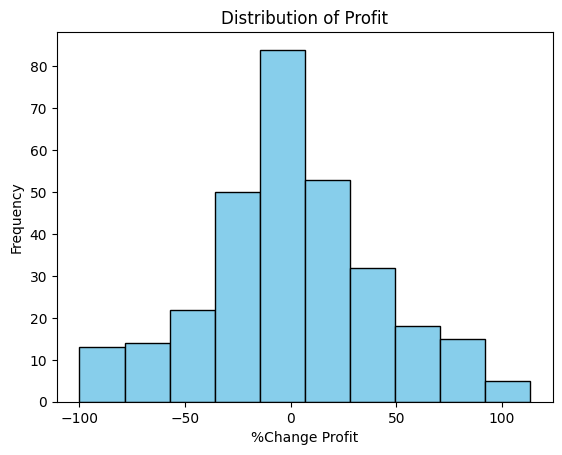

In [ ]:
# Plotting a histogram
plt.hist(pct_net, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('%Change Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()

In [ ]:
pct_net.mean()

0.9927894749297062

# **Model Part2**

In [ ]:
from sklearn.impute import SimpleImputer

columns_to_drop = [col for col in dat.columns if col.startswith('pct_') and col != 'pct_netprofitloss']
dat = dat.drop(columns=columns_to_drop)
dat = dat.drop(columns=["name","year"])
dat = dat[dat['juristicid'] != 107564000341] # ดรอปทิ้งเพราะงบการเงินของ ScbX ค่อนข้างมีปัญหา

# ใช้ SimpleImputer เพื่อเติมค่า NaN ด้วยค่าเฉลี่ย
imputer = SimpleImputer(strategy='constant', fill_value=pct_net.mean())  # หรือ strategy='median'
dat = pd.DataFrame(imputer.fit_transform(dat), columns=dat.columns)

# จัดการดรอป row ที่มีค่า outliers อีกครั้ง
pct_net = dat['pct_netprofitloss'].dropna()

# คำนวณ IQR
Q1 = pct_net.quantile(0.25)
Q3 = pct_net.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# ระบุตำแหน่งของ outliers
outliers = (pct_net < lower) | (pct_net > upper)

# ลบแถวที่มีค่า outliers ออกจาก dat
dat = dat[~outliers]

# ตรวจสอบผลลัพธ์
print("Shape after removing outliers: ", dat.shape)


Shape after removing outliers:  (344, 14)


In [ ]:
dat.describe()

,juristicid,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_netprofitloss
count,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00
mean,107543613798.28,188796516002.09,88981313843.11,50738119008.87,292808280766.08,243433253982.12,285435364327.03,386603750578.49,87981047061.80,11850945096.51,19154698849.18,101178087614.16,10291619728.75,1.42
std,9007053.65,566784089110.37,441838035573.35,66782123312.69,700124865906.10,660098189590.07,766767098398.54,785696262765.88,276672688767.61,19925289876.36,108706672764.66,286233792573.27,13161701671.53,35.60
min,107535000206.00,0.00,0.00,30818170.00,92173030.00,0.00,129178200.00,4447438000.00,28992000.00,0.00,-4598217000.00,47277770.00,-11038080000.00,-87.22
25%,107536000919.00,567882900.00,264724075.00,5904276250.00,14011990000.00,5932215000.00,7055709250.00,43005877500.00,1802978000.00,603317400.00,1388631500.00,7787518500.00,2232832500.00,-16.20
50%,107537002443.00,2297523500.00,1452662000.00,25007270000.00,45842800000.00,17003010000.00,19834935000.00,94977430000.00,13605290000.00,2904642000.00,4348364500.00,22353635000.00,4971710500.00,0.99
75%,107551000223.00,10331450000.00,6661418000.00,67368872500.00,130814700000.00,45313130000.00,76258405000.00,263479400000.00,54389557500.00,11109805000.00,11046657500.00,66181182500.00,11382107500.00,17.73
max,107563000355.00,2911232000000.00,2974949000000.00,380477100000.00,3355426000000.00,2974949000000.00,3624870000000.00,3840076000000.00,2482587000000.00,94837250000.00,1471550000000.00,2560451000000.00,94512110000.00,95.99


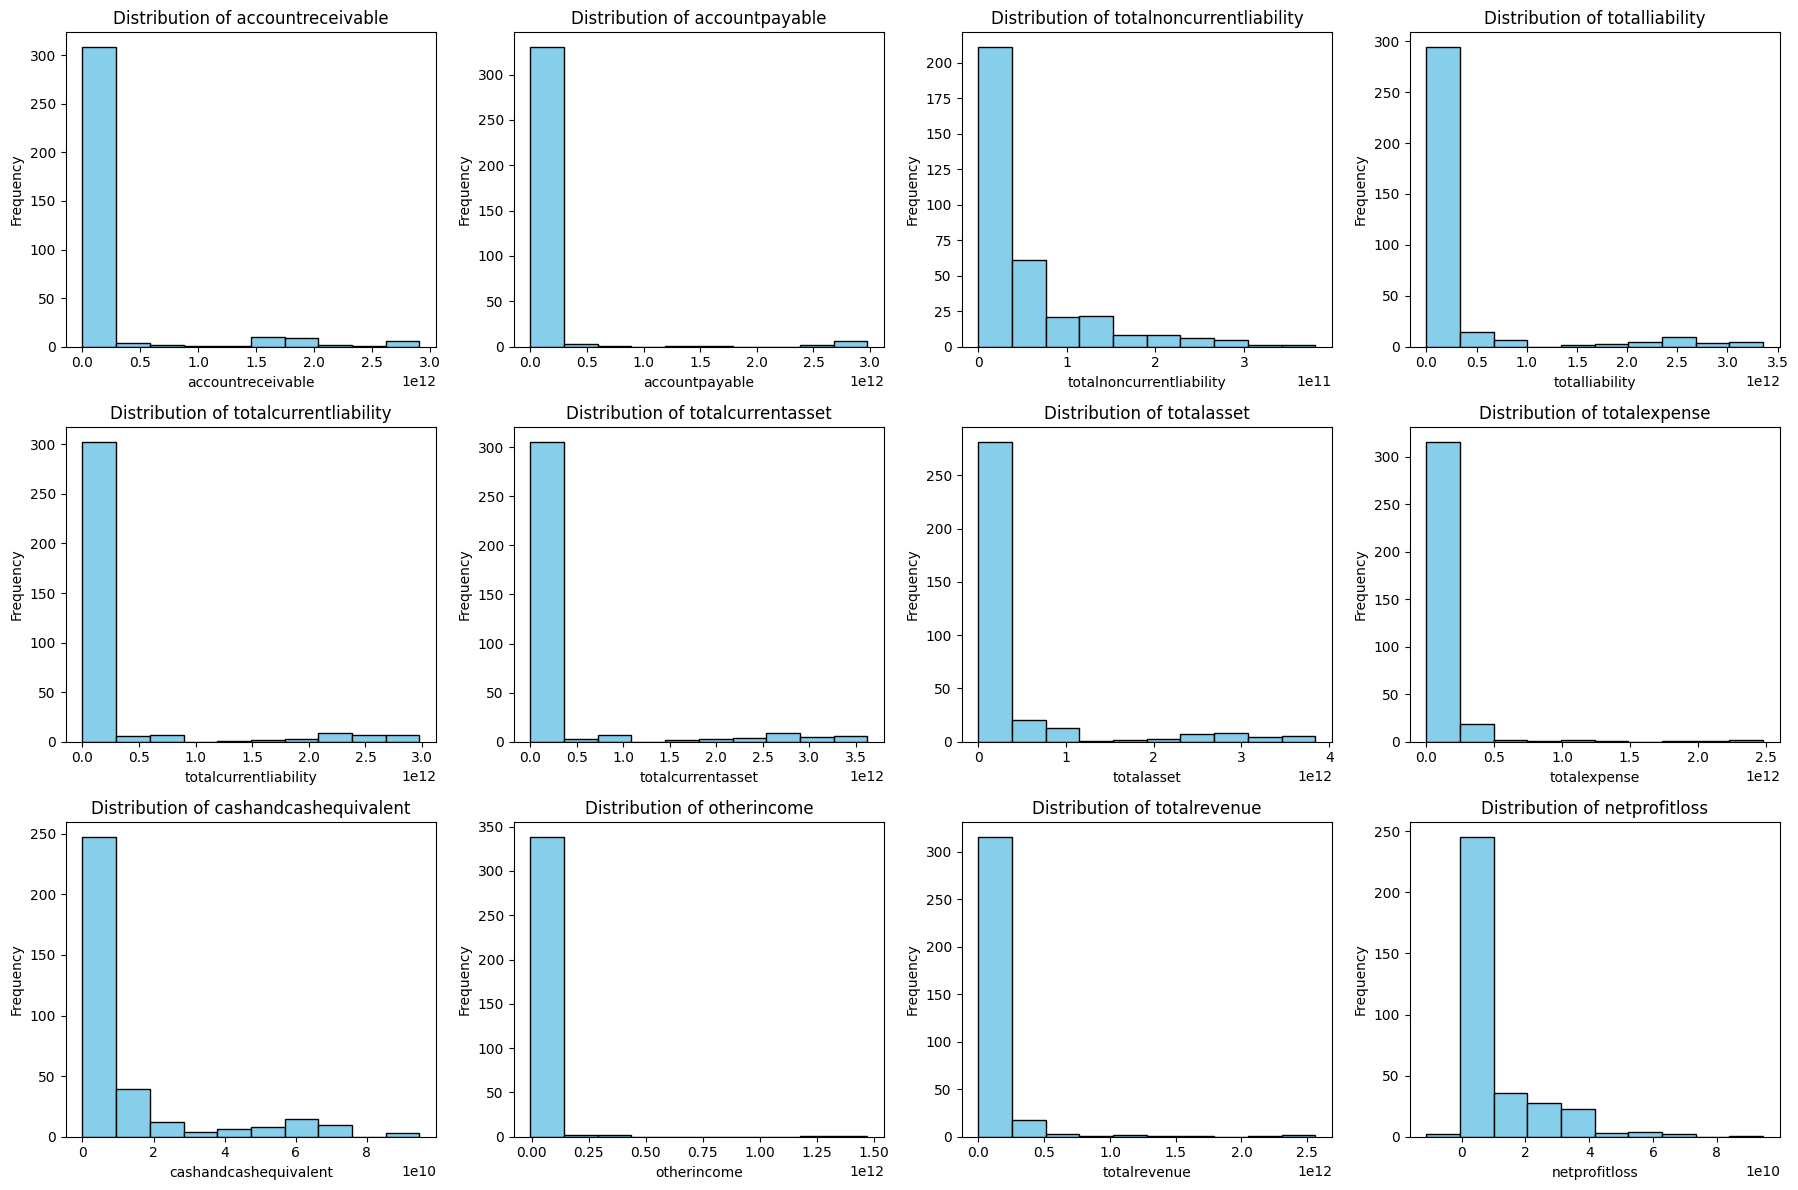

In [ ]:
# ดึงคอลัมน์ที่ 2 ถึง 13 (index 1 ถึง 12) จาก DataFrame
columns = dat.iloc[:, 1:13].columns

# ตั้งค่า subplot grid ให้เหมาะกับจำนวนคอลัมน์
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns grid

# ทำการ plot สำหรับแต่ละคอลัมน์
for i, col in enumerate(columns):
    ax = axes[i//4, i%4]  # เลือกตำแหน่งของ subplot
    ax.hist(dat[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


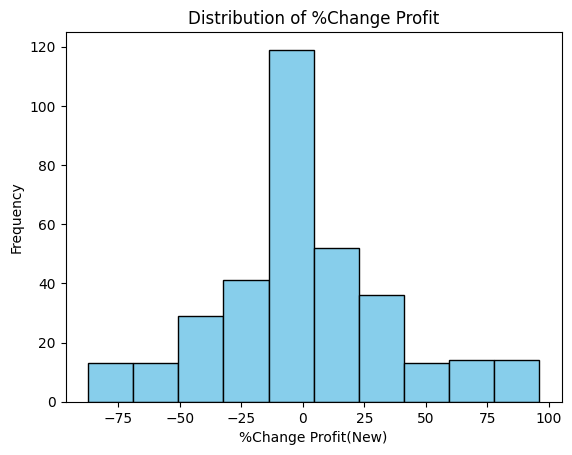

In [ ]:
plt.hist(dat['pct_netprofitloss'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('%Change Profit(New)')
plt.ylabel('Frequency')
plt.title('Distribution of %Change Profit')
plt.show()

In [ ]:
def drop_outliers_iqr(dat):
    columns = dat.iloc[:, 1:13].columns
    for i, col in enumerate(columns):
        if dat[col].dtype == 'float' or dat[col].dtype == 'int':
            Q1 = dat[col].quantile(0.25)
            Q3 = dat[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            dat = dat[(df[col] >= lower) & (dat[col] <= upper)]
    return dat

# เรียกใช้ฟังก์ชันสำหรับดรอปค่า outliers จาก DataFrame ทั้งหมด 13 คอลัมน์
dat_cleaned = drop_outliers_iqr(dat)

# ตรวจสอบผลลัพธ์
print("Shape after dropping outliers:", dat_cleaned.shape)

Shape after dropping outliers: (132, 14)


In [ ]:
dat_cleaned.describe()

,juristicid,accountreceivable,accountpayable,totalnoncurrentliability,totalliability,totalcurrentliability,totalcurrentasset,totalasset,totalexpense,cashandcashequivalent,otherincome,totalrevenue,netprofitloss,pct_netprofitloss
count,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00,132.00
mean,107546136883.33,1621168266.41,1023067245.80,15061016501.52,22922626249.47,8056143124.24,7578347428.03,51651855674.24,6536494301.97,1408803620.90,2760494165.43,9952028002.05,2639074553.71,4.30
std,9756888.64,2575987799.08,1112435237.65,16680947697.06,20464133747.36,7371550098.01,5853948416.26,37935590532.38,6998693783.24,1589482957.63,2679336166.36,7488547723.68,1899968534.48,37.21
min,107536000226.00,0.00,0.00,30818170.00,92173030.00,0.00,129178200.00,4447438000.00,28992000.00,0.00,-607453000.00,47277770.00,-1212204000.00,-85.96
25%,107536001389.00,244550175.00,220007625.00,1088029000.00,7222841000.00,2514370000.00,3401124500.00,21478730000.00,1119969000.00,157943475.00,520959050.00,3963605250.00,1128324750.00,-13.68
50%,107543000031.00,893963300.00,557500000.00,8134197000.00,14150885000.00,5351399500.00,6537078000.00,44392125000.00,2730683000.00,718971800.00,1823734000.00,7450739000.00,2169386500.00,0.99
75%,107555500110.25,2129262750.00,1658813500.00,25208227500.00,36352162500.00,12495422500.00,9811592000.00,76605565000.00,10941280000.00,2166361250.00,4173883500.00,15795592500.00,3561552500.00,20.83
max,107563000355.00,22898800000.00,5336367000.00,67556460000.00,87009500000.00,30104230000.00,29828750000.00,165245700000.00,25793440000.00,6220135000.00,10231190000.00,28576910000.00,7563176000.00,95.99


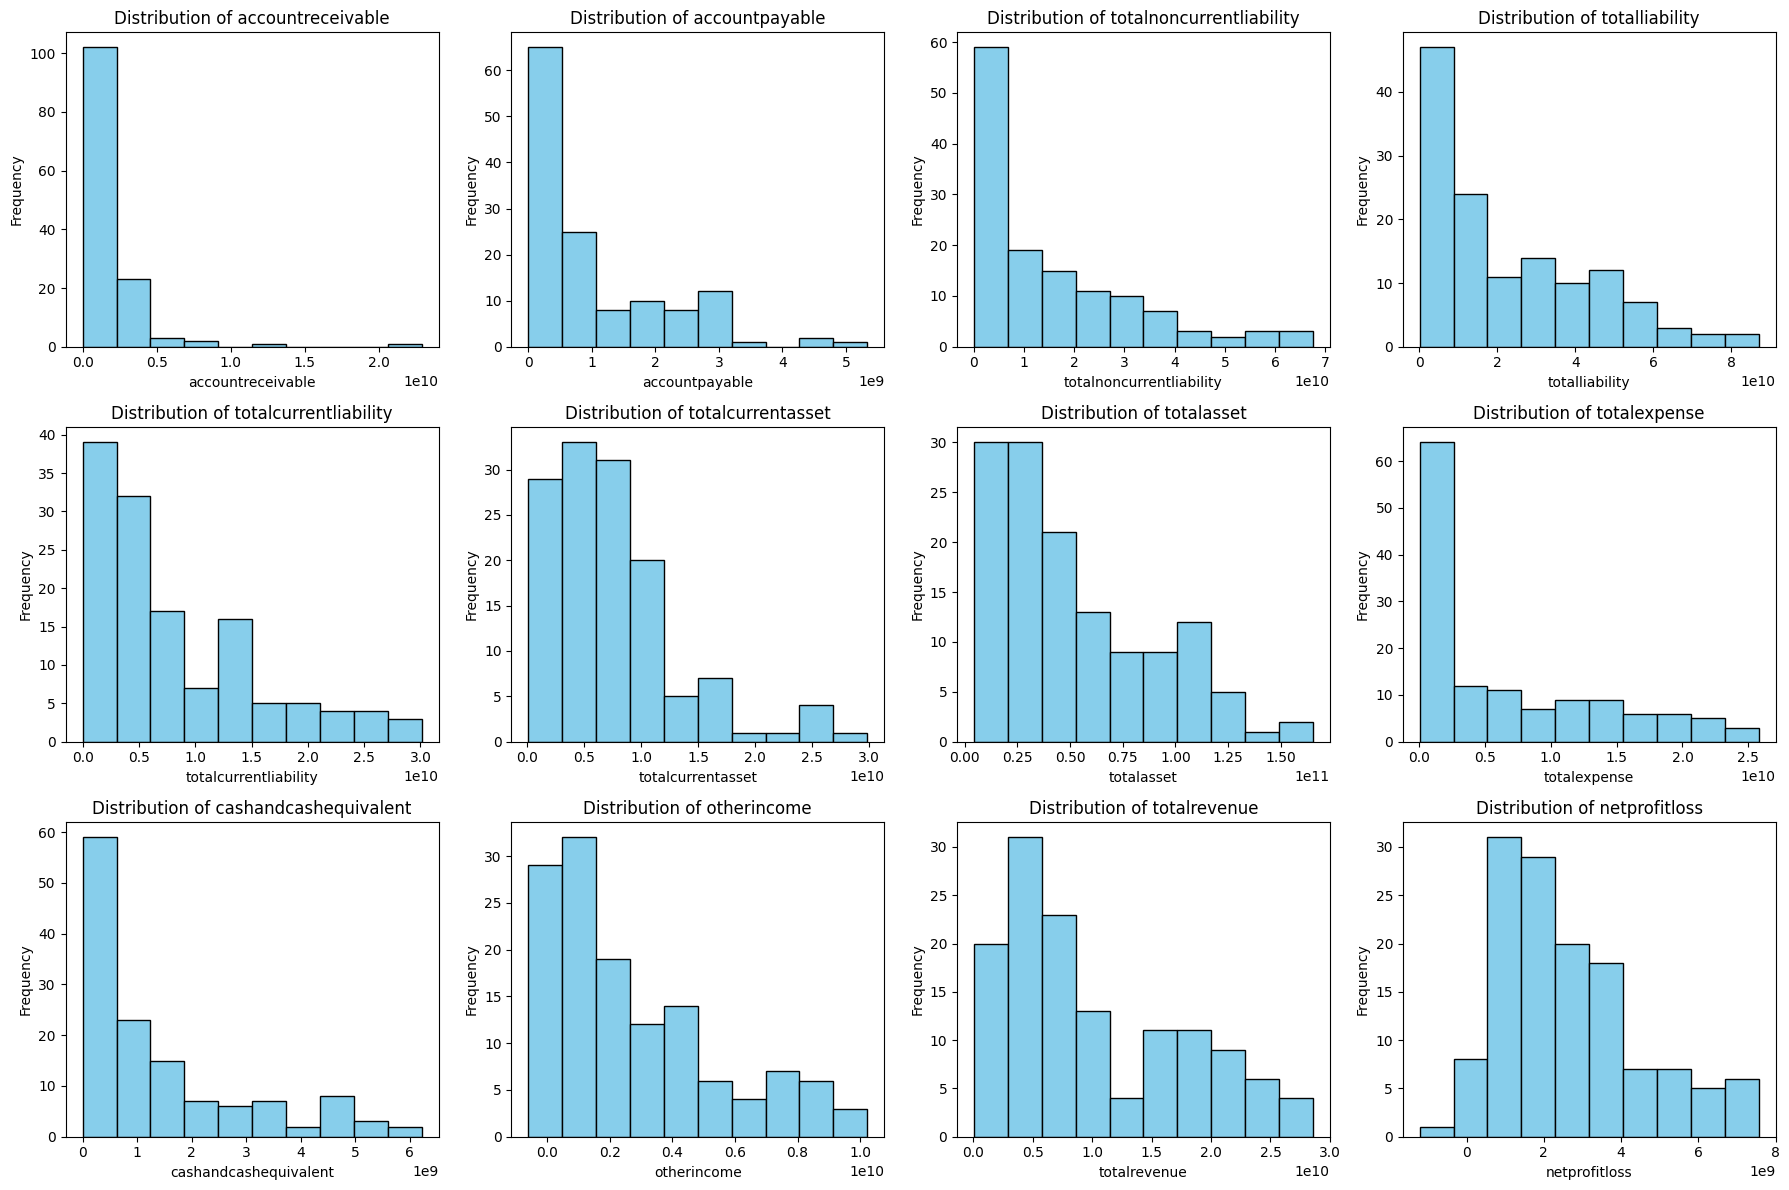

In [ ]:
# ดึงคอลัมน์ที่ 2 ถึง 13 (index 1 ถึง 12) จาก DataFrame
columns = dat_cleaned.iloc[:, 1:13].columns

# ตั้งค่า subplot grid ให้เหมาะกับจำนวนคอลัมน์
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns grid

# ทำการ plot สำหรับแต่ละคอลัมน์
for i, col in enumerate(columns):
    ax = axes[i//4, i%4]
    ax.hist(dat_cleaned[col], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
X = dat_cleaned.drop(columns=["juristicid", "pct_netprofitloss"])
y = dat_cleaned['pct_netprofitloss']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 36 to 396
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountreceivable         132 non-null    float64
 1   accountpayable            132 non-null    float64
 2   totalnoncurrentliability  132 non-null    float64
 3   totalliability            132 non-null    float64
 4   totalcurrentliability     132 non-null    float64
 5   totalcurrentasset         132 non-null    float64
 6   totalasset                132 non-null    float64
 7   totalexpense              132 non-null    float64
 8   cashandcashequivalent     132 non-null    float64
 9   otherincome               132 non-null    float64
 10  totalrevenue              132 non-null    float64
 11  netprofitloss             132 non-null    float64
dtypes: float64(12)
memory usage: 13.4 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 132 entries, 36 to 396
Series name: pct_netprofitloss
Non-Null Count  Dtype  
--------------  -----  
132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [ ]:
X_train = X
y_train = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 36)

In [ ]:
len(X_train)

105

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_scale  = pipeline.fit_transform(X_train)
X_test_scale = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scale,y_train)

LinearRegression()

In [ ]:
print(lin_reg.intercept_)

3.3918481755434464


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
accountreceivable,5.58
accountpayable,-10.12
totalnoncurrentliability,-45.52
totalliability,82.99
totalcurrentliability,-17.68
totalcurrentasset,-3.93
totalasset,-33.12
totalexpense,39.44
cashandcashequivalent,-4.90
otherincome,0.50


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

X_train = np.array(X_train_scale)
X_test = np.array(X_test_scale)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train_scale.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

# หยุดเมื่อค่า val_loss มีแนวโน้มเพิ่มขึ้น
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

r = model.fit(X_train_scale, y_train,
              validation_data=(X_test_scale,y_test),
              batch_size=1,
              epochs=200,
              callbacks=[early_stopping])

Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1782.7416 - val_loss: 851.7466
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1265.9299 - val_loss: 850.8480
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1519.4561 - val_loss: 850.3229
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1366.2114 - val_loss: 849.5941
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1487.2166 - val_loss: 849.0296
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1427.3995 - val_loss: 848.0423
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1591.2673 - val_loss: 847.4045
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1265.2937 - val_loss: 846.6672
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1767.2273 - val_loss: 845.9272
Epoch 10/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1556.9110 - val_loss: 845.2828
Epoch 11/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1768.8467 - val_l

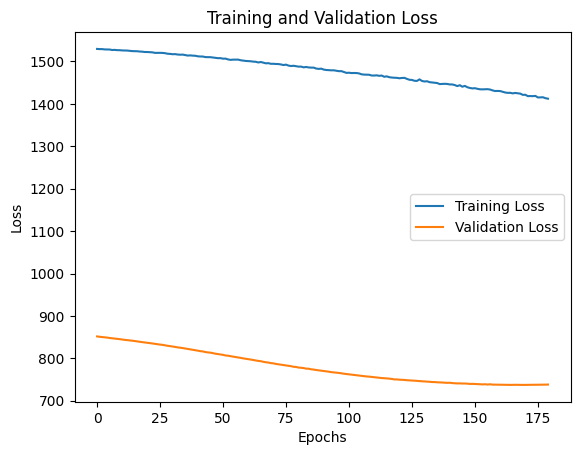

In [ ]:
# Plot ค่า loss และ val_loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_ann = model.predict(X_test_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [ ]:
from sklearn.metrics import r2_score

rscore_ann = r2_score(y_test,y_pred_ann)
print('R2 ANN: {}'.format(rscore_ann))

R2 ANN: 0.07261625822335238


In [ ]:
# y is pct_netprofitloss
y_test_flat = y_test.flatten()
y_pred_ann_flat = y_pred_ann.flatten()

# สร้าง DataFrame จากค่าจริงและค่าที่ทำนาย
df_results = pd.DataFrame({
    'y_test': y_test_flat,
    'y_pred_ann': y_pred_ann_flat
})

df_results

,y_test,y_pred_ann
0,37.47,3.54
1,0.99,5.20
2,-4.52,-1.18
3,-27.76,6.06
4,-5.90,10.53
5,83.99,1.17
6,14.68,16.31
7,0.99,6.42
8,-1.67,8.02
9,0.05,2.37


# Test Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# โมเดล Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_scale, y_train)
y_pred_rf = rf_model.predict(X_test_scale)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE Random Forest: {mse_rf}')
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R² Random Forest: {r2_rf}')


MSE Random Forest: 1428.3950820177647
R² Random Forest: -0.22740098568401246


In [ ]:
from tensorflow.keras.layers import LeakyReLU

X_train = np.array(X_train_scale)
X_test = np.array(X_test_scale)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train_scale.shape[1]))
model.add(LeakyReLU(alpha=0.01))  # Leaky ReLU with alpha=0.01

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

x = model.fit(X_train_scale, y_train,
              validation_data=(X_test_scale,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1731.9752 - val_loss: 986.1029
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1663.4202 - val_loss: 985.9985
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1687.1632 - val_loss: 985.9008
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1409.7148 - val_loss: 985.7511
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1244.2125 - val_loss: 985.6481
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1661.0215 - val_loss: 985.5574
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1514.4808 - val_loss: 985.4460
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1263.2166 - val_loss: 985.3918
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1476.5814 - val_loss: 985.2132
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1603.2446 - val_loss: 985.0941
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1616.7880 - val_loss: 985.0337
Epoch 12

In [ ]:
model = Sequential()

# เพิ่ม layers ด้วยจำนวน neurons ที่หลากหลายและ activation function
model.add(Dense(128, input_dim=X_train.shape[1]))  # เพิ่ม neurons และกำหนด input_dim
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(8))
model.add(LeakyReLU(alpha=0.01))

model.add(Dropout(0.2))  # เพิ่มค่า Dropout

model.add(Dense(1))  # Output layer ไม่มี activation function

# ใช้ optimizer และ loss function
optimizer = Adam(learning_rate=0.0001)  # ปรับ learning rate
model.compile(optimizer=optimizer, loss='mse')

# ใช้ Early Stopping เพื่อหยุดการฝึกเมื่อค่า val_loss ไม่ดีขึ้น
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# เทรนโมเดล
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,  # ปรับ batch size
                    epochs=100,
                    callbacks=[early_stopping])


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 503ms/step - loss: 1585.4971 - val_loss: 988.5334
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1515.7025 - val_loss: 988.3824
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1599.7930 - val_loss: 988.2318
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1487.4142 - val_loss: 988.1170
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1585.5276 - val_loss: 988.0420
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1368.8805 - val_loss: 987.9557
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1622.0773 - val_loss: 987.8467
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1694.2887 - val_loss: 987.7532
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1507.4686 - val_loss: 987.6522
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1607.2350 - val_loss: 987.5562
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1503.0499 - val_loss: 987.4663
Epoch 12/100
3/3 ━

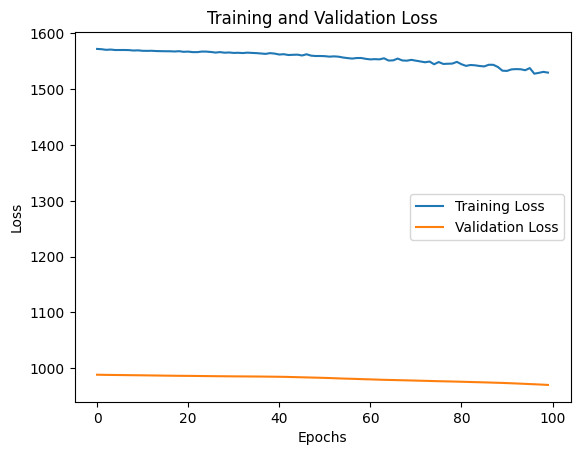

In [ ]:
# Plot ค่า loss และ val_loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()